# Stylometric analysis of Churchills' speeches and his connection to different political parties

## Case Study: How was Churchill speaking before and after World War II?

## 1. Research question

In terms of distance- between Conservative and the other political parties in the British Parliament during Churchill's political service- to which political party was Churchill more skewed when it comes to his speaking manner?

## 2. Preprocessing of the data

### 2.1. Import the nessecary libraries

In [ ]:
pip install ptable

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from IPython.display import IFrame
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import math
%matplotlib inline
from prettytable import PrettyTable

### 2.2. Group the speeches by political party
As a first step, every speech that was scraped from http://www.britishpoliticalspeech.org/speech-archive.htm needed to be grouped according to the political party to which the speaker belongs.
The political party for each speech could be seen in the metadata that was aggregated from the aforementioned archive.
Since there was a copyright constraint for Churchill's speeches we manually added the speeches from https://winstonchurchill.org/.

For every step, we followed the tutorial from François Dominic Laramée (2018) which someone can find on the website *Programming Historian* (https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python).

In [ ]:
#dictionary with the political speeches grouped by the parties.
#one more key about Churchill, because we want to compare Churchill with political parties
#that exist in the British Parliament
speeches = {
    "Conservatives" : [1,4,7,14,16,19,20,23,24,25,26,27,31,32,33,\
                     36,37,38,39,41,42,49,51,52,57,60,61,71,76,\
                     77,78,83,84,88,89,97,106,113,119,127,132,\
                     157,178,190,194,198,201,205,206,207,209,\
                     210,212,214,216,220,223,226,229,233,236,239,\
                     240,243,246,247,250,252,255,257,260,262,264,\
                     267,269,271,273,275,277,279,281,282,283,\
                     284,285,286,287,299,301,302,303,305,307,\
                     310,311,313,314,317,320,323,325,329,331,332,\
                     334,335,338,339,341,342,344,345,347,349,\
                     351,],
    
    "Labours" : [2,5,8,11,15,17,21,28,30,34,40,43,44,46,47,48,50,\
                53,54,56,58,59,62,63,65,66,67,68,69,70,72,73,74,\
               75,79,80,85,86,87,90,91,93,94,95,96,98,99,101,102,\
               103,104,105,107,108,110,111,112,114,115,117,118,120,\
               121,124,125,126,128,129,131,133,134,141,152,153,158,\
               162,163,174,179,191,192,195,197,199,202,204,208,211,\
               213,217,221,224,227,230,234,237,241,244,248,251,256,\
               258,259,261,263,265,266,268,270,272,274,276,278,\
               288,289,291,292,293,294,316,],

#Liberals were the only party that was kept in this analysis since they were contemporary of Churchill
#alongside with Conservatives and Labours
#if someone wants to make a difference analysis that requires Liberal Democrats and SDP Liberal Alliance,
#they can uncomment the aforementioned parties
    
    "Liberals": [215,218,222,225,228,231,235,238,242,245,\
                        249,253,254,280,295,296,297,298,300,304,306,\
                        308,309,312,315,318,319,321,322,324,326,\
                        327,328,330,333,336,337,340,343,346,348,\
                        350,352,353,354],
    
    #"Liberal Democrats": [3,6,9,10,12,13,18,22,29,35,45,55,64,81,\
                         #82,92,100,109,116,122,123,130,135,136,137,\
                        #138,139,140,142,143,144,145,146,147,148,149,\
                        #150,154,155,156,159,160,161,164,165,166,167,\
                        #168,169,170,171,172,173,175,176,177,180,181,\
                        #182,183,184,185,186,187,188,189,193,196,200,\
                        #203],
    
    
    #"SDP Liberal Alliance":[151,219,232],

    "Ante War Churchill" :[355,356,357],
    
    "Post War Churchill" :[358,359,360,361,362,363,364]
}
#Ante War: Churchill's speeches from 1939 and 1940, at the start of the war
#Post War: Churchill's speeches from 1946 until 1966, after the war
#all Churchill's speeches were aggregated from this website: https://winstonchurchill.org/

This function allowed us to compile all the text files that are associated with a single party into a single string. Furthermore, we were able to align each number to the filename. In other words, because every file has the name "political_speech_{number}.txt, we could easily connect the number with the speech per se.

In [ ]:
# A function that compiles all of the text files associated with a single party into a single string
def files_to_string(filenames):
    strings = []
    for filename in filenames:
        with open(f"speeches/political_speech_{filename}.txt") as contents:
            strings.append(contents.read())
    return "\n".join(strings)

In [ ]:
#political parties' names and speeches as strings will be included in a dictionary
speech_by_party = {}
for party, filenames in speeches.items():
    speech_by_party[party] = files_to_string(filenames)

In [ ]:
#run the command below to have a look in the format of the speeches
#for party in speeches:
    #print(speech_by_party[party][:500])

---

## 3. First stylometric method

### 3.1. Mendenhall’s Characteristic Curves of Composition
Mendenhall (1887) argued that we can find an author's stylistic signature by counting the frequency of use of words of different lengths.
We are interested in political parties so we hypothesized that we can apply Mendenhall's method to observe the differences or the similarities between the speeches of political parties; even of individual politicians.
In order to see the "characteristic curve" of word length usage, we follow the code of François Dominic Laramée from *Programming Historian*.
To apply this method we needed to:
1. Tokenize the speeches( `nltk.word_tokenize()`: creates a list of tokens )
2. Remove the stopwords

For this part, we followed a different procedure in comparison with Laramée(2018). We decided to remove the stopwords because we wanted to have a look at the distinct vocabularies of every party instead of the stopwords which will be present in every speech and the distance will be affected.

3. Remove the punctuation
4. Create a list with the length of each token
5. Create a frequency distribution object with nltk FreqDist from the list of word lengths by counting how many one-letter words, two-letter words, etc., exist in each party corpus.
6. Plot this distribution of word lengths for each party corpus for all words up to length 14.

#### Removing stopwords
Run the cell below only if you want to include stopwords in your analysis. Otherwise, there is another cell that includes stopwords in the analysis.

François Dominic Laramée (2018) preserves stopwords, we decided to remove them because we wanted to focus more on content words.

For our research, we decided that it would be best to move past stopwords and look into the more specific vocabulary of each party. We also included the code that keeps the stopwords, for those who are interested
in doing analysis with that.

Of course, the use of stopwords could also serve as interesting avenues of analysis, as argued by Stamatatos (2009), who claims that stopwords can be indicative of specific authors. However, for our research, we are not interested in specific individual authors but rather in the overarching British parties and their way of delivering speeches.

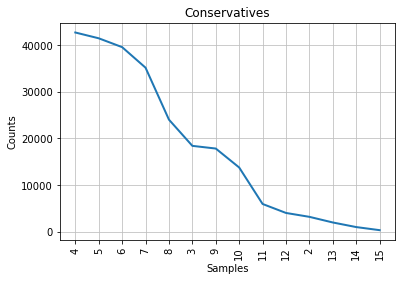

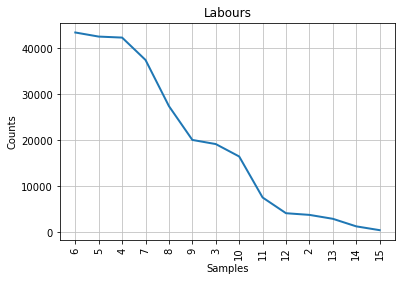

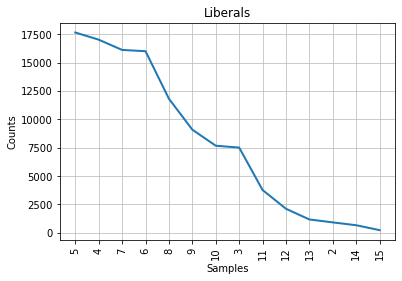

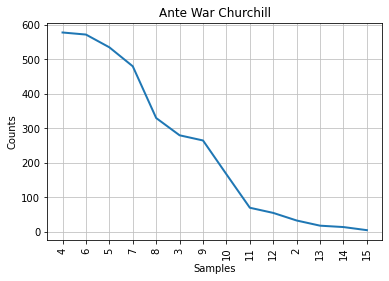

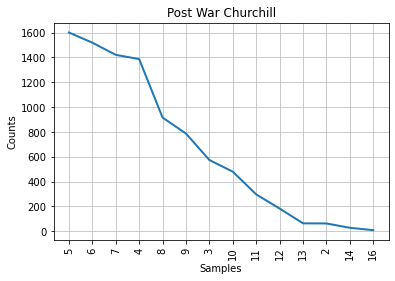

In [ ]:
parties = ("Conservatives",
           "Labours", 
           "Liberals", 
           #"Liberal Democrats",
           #"SDP Liberal Alliance",
           "Ante War Churchill", 
           "Post War Churchill")
#if someone wants to add or remove any of the parties make sure to comment or uncomment said parties
stop_words = set(stopwords.words('english'))
speech_by_party_tokens = {}
speech_by_party_length_distribution = {}
for party in parties:
    tokens = nltk.word_tokenize(speech_by_party[party])
    filtered_speeches = [word for word in tokens if not word.lower() in stop_words]
    
    speech_by_party_tokens[party] = [
        token for token in filtered_speeches if any(character.isalpha() 
                                         for character in token)
    ]
#any() function returns True if any of the items in an iterable is True
#returns False if is it not true
#isalpha is a function that checks for alphabetic characters in a string
#If yes returns True, if no returns False

#distribution of token lengths
    token_lengths = [len(token) for token in speech_by_party_tokens[party]]
    speech_by_party_length_distribution[party] = nltk.FreqDist(token_lengths)

#plot the distribution to see the differences between
#the different political parties in the British Parliament
    plot = speech_by_party_length_distribution[party].plot(14, title = party)
    #plot.set_xlabel("Word Lenghts")
    #no words of 15 letters exist in the speeches. That is the reason we chose 14

**Run the cell below only if you want to include stopwords in your analysis. Keep in mind that you need to uncommment the entire cell, which can be done by selecting all content in the cell and pressing `ctrl(cmd) + /`**.

In [ ]:
# parties = ("Conservatives",
#            "Labours", 
#            "Liberals", 
#            #"Liberal Democrats",
#            #"SDP Liberal Alliance",
#            "Ante War Churchill", 
#            "Post War Churchill")
# #if someone wants to add or remove any of the parties make sure to comment or uncomment said parties

# #François Dominic Laramée preserves stopwords, we decided to remove them
# #in order to observe more clearly the artificiality of political speeches
# speech_by_party_tokens = {}
# speech_by_party_length_distribution = {}
# for party in parties:
#     tokens_stopwords_included = nltk.word_tokenize(speech_by_party[party])

#     speech_by_party_tokens[party] = [
#         token for token in tokens_stopwords_included if any(character.isalpha() 
#                                          for character in token)
#     ]
# #any() function returns True if any of the items in an iterable is True
# #returns False if is it not true
# #isalpha is a function that checks for alphabetic characters in a string
# #If yes returns True, if no returns False

# #distribution of token lengths
#     token_lengths = [len(token) for token in speech_by_party_tokens[party]]
#     speech_by_party_length_distribution[party] = nltk.FreqDist(token_lengths)

# #plot the distribution to see the differences between
# #the different political parties in the British Parliament
#     plot = speech_by_party_length_distribution[party].plot(14, title = party)
#     #plot.set_xlabel("Word Lenghts")
#     #no words of 15 letters exist in the speeches. That is the reason we chose 14

#### Comparative presentation of Characteristic Curve of Composition
In the left column, someone can observe the Characteristic Curve of Composition with the stopwords included and in the right column is the same distribution after the removal of the stopwords.

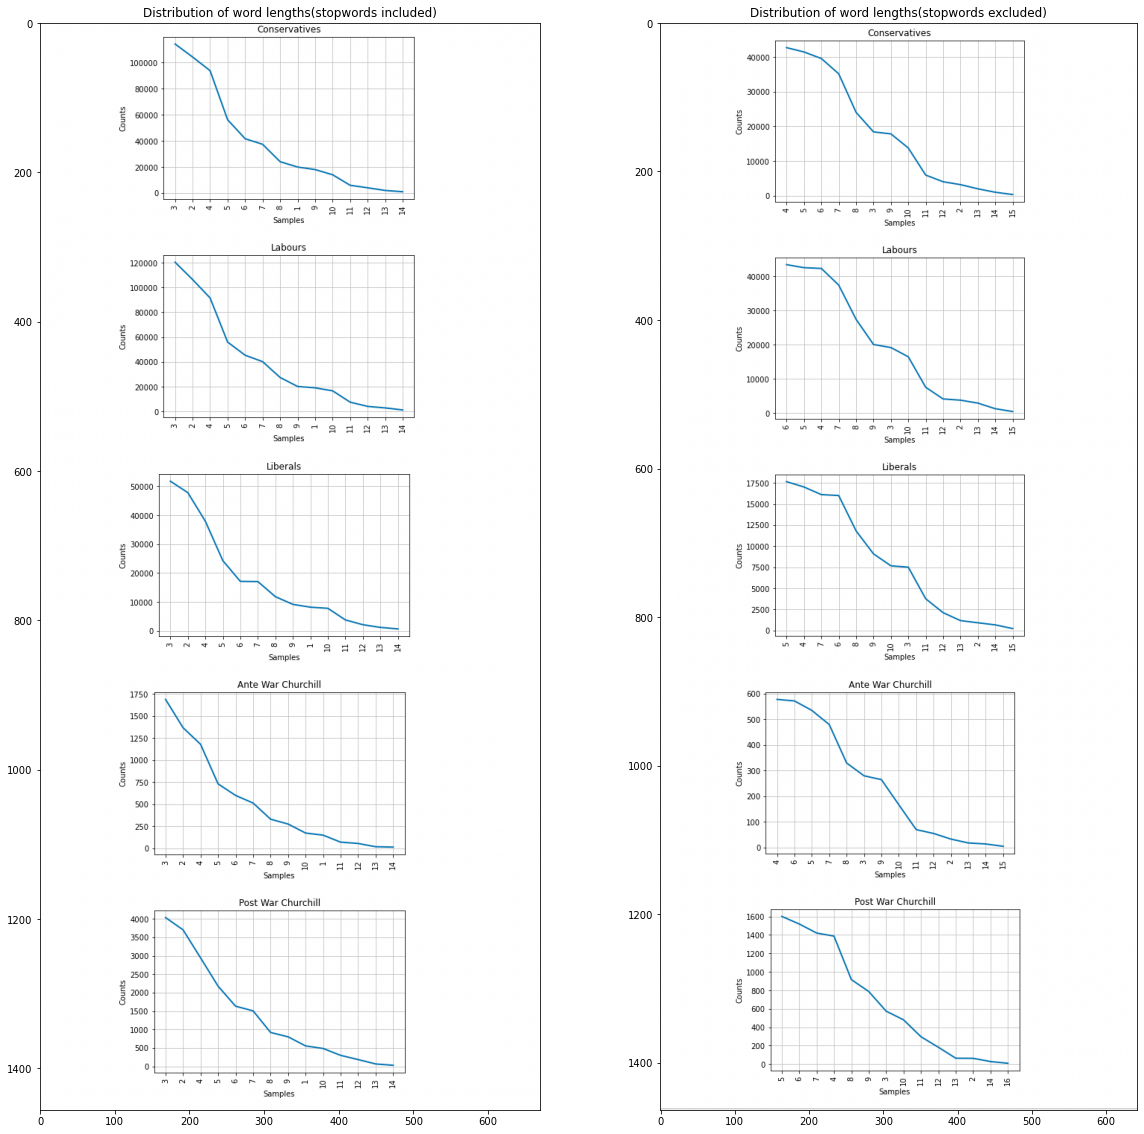

In [ ]:
#this cell is used to compare the graphs with and without stopwords

# figure size in inches optional
rcParams['figure.figsize'] = 20 , 20

# read images
img_A = mpimg.imread('with_stopwords.png')
img_B = mpimg.imread('without_stopwords.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[0].set_title("Distribution of word lengths(stopwords included)")
ax[1].set_title("Distribution of word lengths(stopwords excluded)");

### 3.2. Interperation of the graphs
It can be observed that ,by removing the stopwords, Churchill's graph about the frequency distribution of different lengths is the same with the Conservative party. Churchill was a Conservative thus, at firsth sight, this seems natural and logical.
Although, Mendenhall's method is considered to be blunt because it takes into consideration only the length of the words and it forgets about the actual words in an author's vocabulary which is problematic. Beside that, Mendenhall invented this method at 1871.
For this reasons, we wanted to test this first result with the next two methods.

---

## 4. Second stylometric method

### 4.1. Kilgariff's Chi-Squared Method
We will use this method in order to measure the "distance" between the vocabularies of our speeches. More specifically, we will use the `Chi-Squared` method to test whether a set of observations follow a certain **probability distribution** or **pattern**.
In our case, we want to see if Churchill's speeches are in line with a certain political party.
We will exclude from the political parties the SDP Liberal Alliance because it was established in 1981, 16 years after Churchill's death.
In order to apply this method we have to follow certain steps beforehand:
1. Take the speeches associated with the parties that we want to have a look at.
2. Merge them into a single, large corpus.
3. Count the tokens for each of the words that can be found in the larger corpus.
4. Select the n most common words in the merged corpus.
5. Calculate how many tokens of these `n` most common words we would have expected to find in each of the two original corpora if they had come from the same party:
    To do this we need to divide the number of tokens that we have observed in the merged corpus into `n` values, based on the relative sizes of the parties' contribution to the common corpus.
6. Calculate a chi-squared distance by summing, over the n most common words, the squares of the differences between the actual numbers of tokens found in each party’s corpus and the expected numbers, divided by the expected numbers.
That is the equation that we followed to produce a result based on this method:
![chi-squared.gif](attachment:chi-squared.gif)

### 4.2. Chi-squared method to Churchill's speech before the War ("Ante War Churchill")

In [ ]:
#parties we want to analyze and compare with the Disputed corpus
parties = ("Conservatives", "Labours", "Liberals")
for party in parties:
    speech_by_party_tokens[party] = [
        token.lower() for token in speech_by_party_tokens[party]
    ]
#since we are using the speech by party tokens dictionary we don't need to clean it before.
#as a reminder, the aforementioned dictionary is tokenized, 
#stopwords have been removed and punctuation has been cleaned

speech_by_party_tokens["Ante War Churchill"] = [
    token.lower() for token in speech_by_party_tokens["Ante War Churchill"]
]
#even though the results are the same if we do not convert into lowercase
#we wanted to test if it will increase the accuracy

for party in parties:
    merged_corpus = (speech_by_party_tokens[party] +\
                     speech_by_party_tokens["Ante War Churchill"]
                    )
                    
    merged_freq_distribution = nltk.FreqDist(merged_corpus)
    
    # at this point the output of the FreqDist function looks like a dictionary
    # but it is enclosed in parentheses and it is a freqdist probability class
    # that is why we need to converse it into a list
    most_common = list(merged_freq_distribution.most_common(300))
    
    #we need to find the proportion of the merged corpus that is made up
    #of the party's tokens
    party_share = len(speech_by_party_tokens[party]) / len(merged_corpus)
    

    #calculation of chi-squared method for each of the three parties
    #chisqaured method
    chisquared = 0
    
    for word, merged_count in most_common:
        #how often do we see a common word?
        party_count = speech_by_party_tokens[party].count(word)
        ante_churchill_count = speech_by_party_tokens["Ante War Churchill"].count(word)
        
        expected_party_count = merged_count * party_share
        expected__ante_churchill_count = merged_count * (1 - party_share)
        #(1- party_share: reduce the chance of being the same)
        
        #add the word's contribution to the chi-squared method
        chisquared += (
            (party_count - expected_party_count) * 
            (party_count - expected_party_count) / 
            expected_party_count)        
        
        chisquared += (
        (ante_churchill_count - expected__ante_churchill_count) * 
            (ante_churchill_count - expected__ante_churchill_count) / 
            expected__ante_churchill_count)
    print(f"Ante War Churchill: The chi-squared statistic for \033[4m{party}\033[0m  \033[1m{chisquared}\033[0m")

Ante War Churchill: The chi-squared statistic for Conservatives  1363.9735300020718
Ante War Churchill: The chi-squared statistic for Labours  1830.6854403482646
Ante War Churchill: The chi-squared statistic for Liberals  1119.4419993720871


### 4.3. Chi-squared method to Churchill's speech after the War ("Post War Churchill")

In [ ]:
#parties we want to analyze and compare with Churchill's speeches
parties = ("Conservatives", "Labours", "Liberals")
for party in parties:
    speech_by_party_tokens[party] = [
        token.lower() for token in speech_by_party_tokens[party]
    ]
speech_by_party_tokens["Post War Churchill"] = [
    token.lower() for token in speech_by_party_tokens["Post War Churchill"]
]
#even though the results are the same if we do not convert into lowercase
#we wanted to test if it will increase the accuracy
for party in parties:
    merged_corpus = (speech_by_party_tokens[party] +\
                     speech_by_party_tokens["Post War Churchill"]
                    )
                    
    merged_freq_distribution = nltk.FreqDist(merged_corpus)
    
    # at this point the output of the FreqDist function looks like a dictionary
    # but it is enclosed in parentheses and it is a freqdist probability class
    # that is why we need to converse it into a list
    most_common = list(merged_freq_distribution.most_common(300))
    
    #we need to find the proportion of the merged corpus that is made up
    #of the party's tokens
    party_share = len(speech_by_party_tokens[party]) / len(merged_corpus)
    

    #calculation of chi-squared method for each of the three parties
    #chisqaured method
    chisquared = 0
    
    for word, merged_count in most_common:
        #how often do we see a common word?
        party_count = speech_by_party_tokens[party].count(word)
        post_churchill_count = speech_by_party_tokens["Post War Churchill"].count(word)
        
        expected_party_count = merged_count * party_share
        expected__post_churchill_count = merged_count * (1 - party_share)
        #(1- party_share: reduce the chance of being the same)
        
        #add the word's contribution to the chi-squared method
        chisquared += (
            (party_count - expected_party_count) * 
            (party_count - expected_party_count) / 
            expected_party_count)        
        
        chisquared += (
        (post_churchill_count - expected__post_churchill_count) * 
            (post_churchill_count - expected__post_churchill_count) / 
            expected__post_churchill_count)
    print(f"Ante War Churchill: The chi-squared statistic for \033[4m{party}\033[0m  \033[1m{chisquared}\033[0m")

Ante War Churchill: The chi-squared statistic for Conservatives  3099.0715257509623
Ante War Churchill: The chi-squared statistic for Labours  3548.101580177468
Ante War Churchill: The chi-squared statistic for Liberals  2704.24142055669


### 4.4. Overview table of the chi-squared values

A table was created with every chi-squared value for Ante War and Post War Churchill distances from the political parties of the British Parliament. This will allow us to make a more meaningful comparison and even gain some new insights.

In [ ]:
# Specify the Column Names while initializing the Table
table = PrettyTable()
table.field_names = ["", "\033[1mConservatives\033[0m", "\033[1mLabours\033[0m", "\033[1mLiberals\033[0m"]

# Add rows 
table.add_row(["\033[1mAnte WWII Churchill\033[0m", "1363.9735300020718", "1830.6854403482646", "1119.4419993720871"]) 
table.add_row(["\033[1mPost WWII Churchill\033[0m", "3099.0715257509623", "3548.101580177468", "2704.24142055669"]) 
  
print("\033[1mChi-sqaured values of Churchill's speeches before and after World War II\033[0m")
print(table)

Chi-sqaured values of Churchill's speeches before and after World War II
+---------------------+--------------------+--------------------+--------------------+
|                     |   Conservatives    |      Labours       |      Liberals      |
+---------------------+--------------------+--------------------+--------------------+
| Ante WWII Churchill | 1363.9735300020718 | 1830.6854403482646 | 1119.4419993720871 |
| Post WWII Churchill | 3099.0715257509623 | 3548.101580177468  |  2704.24142055669  |
+---------------------+--------------------+--------------------+--------------------+


### 4.5. Interpretation of the results

Churchill before the war (Ante WWII Churchill row is closer to the Liberals rather than Conservatives and he is far away from Labours which is not aligned with our hypothesis. After the War(Post War Churchill) he is back again closer to the Conservative party which is very logical since Churchill was a Conservative and we can observe from the numbers a tendency to be likeable to every political party.

Besides the fact that Kilgariff's *Chi-squared* method is much more precise than Mendenhall's *Characteristic Curves of Composition*, it is still a precarious method because words that appear very frequently tend to disfigure the output because of the disproportionate amount of weight they carry.
As François Dominic Laramée (2018) says: "sometimes this is fine; other times, subtle differences in a style represented by the ways in which authors use more unusual words will go unnoticed".
This exact inadequacy led us to the choice of implementing John Burrow's Delta Method.
This adds a linked superscript 

**A quick note**: 'Ante War Churchill' refers to the first years of the war; from 1939 to 1940. Whereas 'Post War Churchill' refers to the years after the war from 1946 until the death of Churchill.

---

## 5. Third stylometric method

### 5.1. John Burrow's Delta Method
An even more specific stylometric test can be applied with this method.
`Delta` measures the distance between two texts; from this perspective is kind of similar to the `chi-squared` method.
The difference between those two methods is that the former one can compare a text (or a set of texts) to many different author's signatures(features) at the same time.
To be more specific, `Delta` measures how much a speech (or a set of speeches) written by someone who is unknown diverge from the average of all of the parties' speeches put together.
Since we know who the author is, we want to see the distance between Churchill's text during the first years of World War II and British political parties.
This method gives equal weight to every feature, therefore it avoids the problem of disproportionate weight to certain most-used words as in Kilgariff's *chi-squared* method.

As this method is used in *Programming Historian* the steps are the following:
1. Assemble a large corpus made up of texts grouped by an arbitrary number of political parties. I.e., the number of political parties = `x`.
2. Find the `n` most frequent words(features) in the merged corpus to use as features (using FreqDist).
3. For each of these `n` features find the share of each of the `x` authors' subcorpora represented by this feature, as a percentage of the total number of words. E.g., the word 'the' may represent 5,67% of the words in Author A's subcorpora.
4. For these `x` values calculate the mean and the standard deviation and use them as the **official mean** and the **standard deviation** for this feature over the whole corpus. This will **help us to control large sub-corpora to over-influence the results**. In other words, we will calculate a **mean of means** instead of calculating a single value representing the share of the entire corpus represented by each word.
5. For each of the `n` features and `x` subcorpora, calculate a z-score describing how far away from the corpus norm the usage of this particular feature in this particular subcorpus happens to be. To do this, subtract the “mean of means” for the feature from the feature’s frequency in the subcorpus and divide the result by the feature’s standard deviation. Figure 7 shows the z-score equation for feature ‘i’, where C(i) represents the observed frequency, the greek letter mu represents the mean of means, and the greek letter sigma, the standard deviation.
![Screenshot%202022-01-07%20at%2020.26.10.png](attachment:Screenshot%202022-01-07%20at%2020.26.10.png)
6. Calculate the `z-scores` for each feature in the text for which we want to determine authorship.
7. Finally, calculate a `delta score` comparing the anonymous paper with each candidate’s subcorpus. To do this, take the average of the absolute values of the differences between the z-scores for each feature between the anonymous paper and the candidate’s subcorpus. (Read that twice!) This gives equal weight to each feature, no matter how often the words occur in the texts; otherwise, the top 3 or 4 features would overwhelm everything else.
8. To understand the output: the winning candidate is the author for whom the delta score between the author's subcorpus and the test case is the lowest.

### 5.2. Creation of a large unified corpus that contains all of the speeches from the three political parties

In [ ]:
#Assemble a large corpus made up of texts grouped by an arbitrary number of political parties. 
#i.e., number of political parties = `x`.
parties = ("Conservatives", "Labours", "Liberals")

for party in parties:
    filtered_speeches = [word for word in tokens if not word.lower() in stop_words]
    speech_by_party_tokens[party] = ([token.lower() for token in speech_by_party_tokens[party]]
                                    )

#combining every corpus except our test case which is the Churchill's speeches
every_corpus_merged = []
for party in parties:
    every_corpus_merged += speech_by_party_tokens[party]

#Find the `n` most frequent words(features) in the merged corpus 
#to use as features (using FreqDist)
    
#frequency distribution
every_corpus_merged_freq_dist = nltk.FreqDist(every_corpus_merged)\
                            .most_common(100)
#according to Evert et al. (2017) 50-100 most common words
#had proven to be good candidates
#because they distinguish reliably between authors
#take a look at the list
every_corpus_merged_freq_dist[:10]

[('people', 5888),
 ('government', 5095),
 ('country', 4125),
 ('us', 3912),
 ('party', 3710),
 ('one', 3608),
 ('would', 3199),
 ('new', 3088),
 ('britain', 3078),
 ('labour', 2864)]

#### 5.2.1. Calculating features for each subcorpus
We will look at the frequencies of each feature(word) in each party's subcorpus, as a proportion of the total number of tokens in the subcorpus.

In [ ]:
#For each of these `n` features find the share of each of the `x` authors' subcorpora represented by this feature, 
#as percentage of the total number of words

features = [word for word, frequency in every_corpus_merged_freq_dist]
features_frequencies = {}

for party in parties:
    features_frequencies[party] = {}
    overall = len(speech_by_party_tokens[party])
    
#calculating each feature's presence in the subcorpus
    for feature in features:
        presence = speech_by_party_tokens[party].count(feature)
        features_frequencies[party][feature] = presence/overall

#'the' covers 5% of the overall words(features) in the speeches of Conservatives
#'of' covers 3% of the overall words(features) in the speeches of Conservatives etc.
#bag of words model: how often a words occurs in each document

#### 5.2.2. Calculating feature averages and standard deviations

In this step, we need to compute the mean and the standard deviation for each feature and we will store this result in another dictionary
The formula for standard deviation is the following:
![Screenshot%202022-01-07%20at%2023.19.20.png](attachment:Screenshot%202022-01-07%20at%2023.19.20.png)

In [ ]:
#For these `x` values calculate the mean and the standard deviation 
#and use them as the official mean and the standard deviation for this feature over the whole corpus. 
#This will help us to control large sub-corpora to over-influence the results. 
#In other words we will calculate a mean of means
#instead of calculating a single value representing the share of the entire corpus represented by each word.
features_statistics = {}

for feature in features:
    features_statistics[feature] = {}
    
    #mean of means
    feature_average = 0
    for party in parties:
        feature_average += features_frequencies[party][feature]
    feature_average /= len(parties)
    features_statistics[feature]["Mean"] = feature_average
    
    #sample standard deviation
    feature_stdev = 0
    for party in parties:
        difference = features_frequencies[party][feature] - features_statistics[feature]["Mean"]
        feature_stdev += difference * difference
    feature_stdev /= (len(parties) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    features_statistics[feature]["Standard Deviation"] = feature_stdev
#print(features_statistics)
#we can think of this calculations as a high-dimensional vector for each
#each of the words-features correspond to one dimension of it.

#### 5.2.3. Calculating z-scores

Now that the observed frequencies in the political parties' subcorpora have been transformed into z-scores describing how far away from the "corpus norm" these observations are.
Therefore, we need to calculate z-scores ((value-mean)/st_dev) for each feature and then store the results in a dictionary

In [ ]:
#For each of the `n` features and `x` subcorpora, 
#calculate a z-score describing how far away from the corpus norm the usage of this particular feature in this particular subcorpus happens to be.#
#To do this, subtract the “mean of means” for the feature from the feature’s frequency in the subcorpus 
#and divide the result by the feature’s standard deviation. 
z_scores_feature = {}
for party in parties:
    z_scores_feature[party] = {}
    
    for feature in features:
        value = features_frequencies[party][feature]
        mean = features_statistics[feature]["Mean"]
        st_dev = features_statistics[feature]["Standard Deviation"]
        z_scores_feature[party][feature] = (value-mean) / st_dev
    #print(z_scores_feature)

#### 5.2.4. Ante War Churchill pre-delta process

In [ ]:
#cleaning the text
ante_churchill_speech_tokens1 = nltk.word_tokenize(speech_by_party["Ante War Churchill"])
ante_churchill_filtered_tokens = [word for word in ante_churchill_speech_tokens1 if not word.lower() in stop_words]
ante_churchill_speech_tokens = [token.lower() for token in ante_churchill_filtered_tokens
              if any(character.isalpha() for character in token)]

#computation of some values that will be nessecary for the calculation of z-scores
overall = len(ante_churchill_speech_tokens)
ante_churchill_speech_freqs = {}
for feature in features:
    presence = ante_churchill_speech_tokens.count(feature)
    ante_churchill_speech_freqs[feature] = presence / overall
    
#computation of z-scores
ante_churchill_z_scores = {}
for feature in features:
    ante_churchill_value = ante_churchill_speech_freqs[feature]
    ante_churchill_mean = features_statistics[feature]["Mean"]
    ante_churchill_st_dev = features_statistics[feature]["Standard Deviation"]
    ante_churchill_z_scores[feature] = (ante_churchill_value - ante_churchill_mean) / ante_churchill_st_dev
    #print(f"Churchill's speeches z-score for feature '{feature}' is {churchill_z_scores[feature]}.")

#### 5.2.5. Post War Churchill pre-delta process

In [ ]:
#cleaning the text
post_churchill_speech_tokens1 = nltk.word_tokenize(speech_by_party["Post War Churchill"])
post_churchill_filtered_tokens = [word for word in post_churchill_speech_tokens1 if not word.lower() in stop_words]
post_churchill_speech_tokens = [token.lower() for token in post_churchill_filtered_tokens
              if any(character.isalpha() for character in token)]

#computation of some values that will be nessecary for the calculation of z-scores
overall = len(post_churchill_speech_tokens)
post_churchill_speech_freqs = {}
for feature in features:
    presence = post_churchill_speech_tokens.count(feature)
    post_churchill_speech_freqs[feature] = presence / overall

#computation of z-scores
post_churchill_z_scores = {}
for feature in features:
    post_churchill_value = post_churchill_speech_freqs[feature]
    post_churchill_mean = features_statistics[feature]["Mean"]
    post_churchill_st_dev = features_statistics[feature]["Standard Deviation"]
    post_churchill_z_scores[feature] = (post_churchill_value - post_churchill_mean) / post_churchill_st_dev
    #print(f"Churchill's speeches z-score for feature '{feature}' is {churchill_z_scores[feature]}.")

#### 5.2.6. Calculating Delta for speeches of Churchill before World War II

In [ ]:
for party in parties:
    delta = 0
    for feature in features:
#The math.fabs() method returns the absolute value of a number, as a float.
#Absolute denotes a non-negative number. This removes the negative sign of the value if it has any.
#Unlike Python abs(), this method always converts the value to a float value.
        delta += math.fabs((ante_churchill_z_scores[feature] - 
                           z_scores_feature[party][feature]))
    delta /= len(features)
    print(f"Delta score for \033[4m{party}\033[0m is \033[1m{delta}\033[0m")

Delta score for Conservatives is 3.316702930090722
Delta score for Labours is 3.4098588413147493
Delta score for Liberals is 3.0821662051340013


## Post War Churchill

#### 5.2.7. Calculating Delta for speeches of Churchill after World War II

In [ ]:
for party in parties:
    delta = 0
    for feature in features:
#The math.fabs() method returns the absolute value of a number, as a float.
#Absolute denotes a non-negative number. This removes the negative sign of the value if it has any.
#Unlike Python abs(), this method always converts the value to a float value.
        delta += math.fabs((post_churchill_z_scores[feature] - 
                           z_scores_feature[party][feature]))
    delta /= len(features)
    print(f"Delta score for \033[4m{party}\033[0m is \033[1m{delta}\033[0m.")

Delta score for Conservatives is 2.8132839829192178.
Delta score for Labours is 2.831078467481486.
Delta score for Liberals is 2.5395264256243384.


### 5.3. Overview table of delta scores

In [ ]:
# Specify the Column Names while initializing the Table
table = PrettyTable()
table.field_names = ["", "\033[1mConservatives\033[0m", "\033[1mLabours\033[0m", "\033[1mLiberals\033[0m"]

# Add rows 
table.add_row(["\033[1mAnte WWII Churchill\033[0m", "3.316702930090722", "3.4098588413147493", "3.0821662051340013"]) 
table.add_row(["\033[1mPost WWII Churchill\033[0m", "2.8132839829192178", "2.831078467481486", "2.5395264256243384"]) 
  
print("\033[1mChi-sqaured values of Churchill's speeches before and after World War II\033[0m")
print(table)

Chi-sqaured values of Churchill's speeches before and after World War II
+---------------------+--------------------+--------------------+--------------------+
|                     |   Conservatives    |      Labours       |      Liberals      |
+---------------------+--------------------+--------------------+--------------------+
| Ante WWII Churchill | 3.316702930090722  | 3.4098588413147493 | 3.0821662051340013 |
| Post WWII Churchill | 2.8132839829192178 | 2.831078467481486  | 2.5395264256243384 |
+---------------------+--------------------+--------------------+--------------------+


## 6. Conclusion

The dataset maps the stylistic distance between characteristics of speeches of the three prominent British political parties in relation to Churchill’s speeches. The higher the number, the further the stylistic characteristics are from Churchill’s speeches. In this sense, Churchill’s speeches can be seen as the number 0 and the closer it gets to 0, the more similar it is to Churchill’s speeches.

The results found in the delta method shows that Churchill’s speeches were closer in terms of style to speeches by the Liberal party than the Conservative party.
One explanation for this could be the emotive language used that was indicative of Churchill’s speeches, but not always appreciated by his constituents. 
Research on conservative and liberal speeches and their style found that conservatives are more likely to use less complex language than their liberal counterparts.  
[(Schoonevelde et al., 2019)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0208450)   
Emotive language found in Churchill’s speeches might have helped this dimension, seeing as some of his conservative constituents were not as keen on his way of delivering speeches, with one Tory MP commenting that Churchill was “a word-spinner, a second-rate rhetorician” [(International Churchill Society, 2022)](https://winstonchurchill.org/resources/speeches/speeches-about-winston-churchill/his-speeches-how-churchill-did-it/).  
By implementing more emotive language into his speeches it could be feasible that his speeches moved away from the style of Conservative speeches, and simultaneously moving towards the style of Liberal speeches.

In comparison to the other party, Churchill’s speeches seemed the furthest away from the Labour party’s speeches. This could be explained by his disdain towards socialism, supported by some quotes outlined below:

>“Socialism is the philosophy of failure, the creed of ignorance and the gospel of envy.” [Churchill, W. S. (2022). Europe Unite: Speeches 1947 and 1948 by Winston Churchill. London, United Kingdom: Houghton Mifflin].

>“The inherent vice of capitalism is the unequal sharing of blessings. The inherent virtue of Socialism is the equal sharing of miseries.” [Winston Churchill, House of Commons, 22 October 1945].

The fact that Churchill style of speaking is closer to that of Liberals could be connected with Churchill's political term in the offices of Liberals from 1904- 1908. Growing in a liberal environment could have caused Churchill to adjust his way of speaking in a more liberal way.

Although, Churchill after World War II is hard to be distinguished by any difference in the style of his speeches because the numbers are very close to each other in terms of distance. Thus, we conclude that Churchill's fear of losing leadership during World War II (which was done in the general elections of 1945) might have forced him to create a new kind of style of speaking, which was more or less aligned with every political party that existed in the British Parliament during Churchill's time.

## References
>Burrows, J. (2002). “Delta”: a Measure of Stylistic Difference and a Guide to Likely Authorship. Literary and Linguistic Computing, 17(3), 267–287. https://doi.org/10.1093/llc/17.3.267.]

>Churchill, W. S. (2022). Europe Unite: Speeches 1947 and 1948 by Winston Churchill. London, United Kingdom: Houghton Mifflin.

>Evert, S., Jannidis, F., Proisl, T., Reger, I., Pielström, S., Schöch, C., & Vitt, T. (2017). Understanding and explaining Delta measures for authorship attribution. Digital Scholarship in the Humanities, 32(suppl_2), ii4–ii16. https://doi.org/10.1093/llc/fqx023.
    
>Kilgarriff, A. (2001). Comparing Corpora. International Journal of Corpus Linguistics, 6(1), 97–133. https://doi.org/10.1075/ijcl.6.1.05kil.
    
>Laramée, F. D. (2018). Introduction to stylometry with Python. Programming Historian. Retrieved January 7, 2022, from https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python#a-note-about-parts-of-speech.
    
>Mendenhall, T. C. (1887). The Characteristic Curves of Composition. Science, ns-9(214s), 237–246. https://doi.org/10.1126/science.ns-9.214s.237.
    
>Schoonvelde, M., Brosius, A., Schumacher, G., & Bakker, B. N. (2019). Liberals lecture, conservatives communicate: analyzing complexity and ideology in 381,609 political speeches. Plos One, 14(2), 0208450. https://doi.org/10.1371/journal.pone.0208450

>Stamatatos, E. (2009). A survey of modern authorship attribution methods. Journal of the American Society for Information Science and Technology, 60(3), 538–556. https://doi.org/10.1002/asi.21001.